In [19]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_table("fruits_dataset.txt")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [21]:
df.shape

(59, 7)

In [22]:
df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

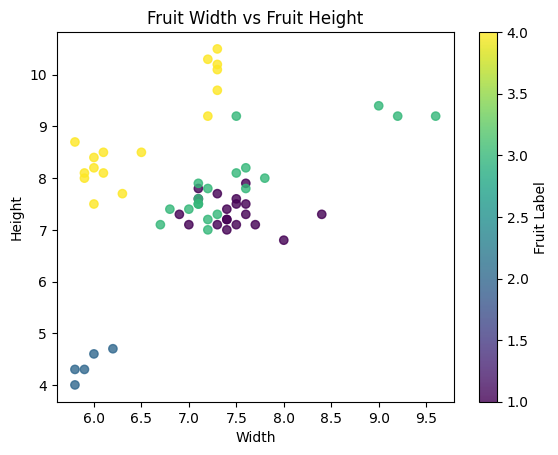

In [23]:
plt.scatter(df['width'], df['height'], c=df['fruit_label'], alpha=0.8)
plt.title('Fruit Width vs Fruit Height')
plt.colorbar(label='Fruit Label')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [24]:
X = df[['mass', 'width', 'height']].values
y = df['fruit_label'].values
# X, y

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [26]:
# def distance(X, Y): # X and Y are tuples
#     # print(X[0], Y[0])
#     # print(X[1], Y[1])
#     # print(X[2], Y[2])
#     return math.sqrt((X[0] - Y[0]) ** 2 + (X[1] - Y[1]) ** 2 + (X[2] - Y[2]) ** 2)

In [27]:
def distance(x, y):
    # print(type(x), type(y))
    # print(x)
    return math.sqrt(sum((x1 - y1) ** 2 for x1, y1 in zip(x, y)))

In [28]:
# print(distance((1, 2, 3), (4, 5, 6)))  # Output: 5.196152422706632

In [29]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def pred(self, X):
        y_preds = [self.compute(x) for x in X]
        return y_preds

    def compute(self, x):
        # for i in self.X_train:
        #     if(type(i) == 'numpy.int64'):
        #         print("this is where the problem is", i)
        #         break
        distances = [distance(x, x_train) for x_train in self.X_train]
        # print(distances)
        first_k = sorted(range(len(distances)), key=lambda i : distances[i])[:self.k]
        # print(first_k)
        first_k_labels = [self.y_train[i] for i in first_k]
        # print(first_k_labels)
        frequency = {}
        for i in first_k_labels:
            frequency.setdefault(i, 0)
            frequency[i] += 1
            # print(frequency)

        frequent = max(frequency.values())
        for i, j in frequency.items():
            if j == frequent:
                mode = i
        # print(mode)
        return mode
        # This will improve acc
        # from collections import Counter
        # most_common = Counter(first_k_labels).most_common(1)[0][0]
        # return most_common

In [30]:
knn = KNN(5)
knn.fit(X_train, y_train)

y_train_preds = knn.pred(X_train)
y_test_preds = knn.pred(X_test)

In [31]:
def accuracy(y_target, y_preds):
    return sum(y1 == y2 for y1, y2 in zip(y_target, y_preds)) / len(y_target)

In [32]:
# This is redundant
train_accuracy = accuracy(y_train, y_train_preds)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

test_accuracy = accuracy(y_test, y_test_preds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%') 

Training Accuracy: 78.72%
Test Accuracy: 58.33%


In [33]:
knn = KNN(5)
# print(X)
knn.fit(X, y)
y_preds = knn.pred(X)
total_accuracy = accuracy(y, y_preds)
print(f'Total Accuracy: {total_accuracy * 100:.2f}%') 

Total Accuracy: 77.97%


In [34]:
new_fruit = [150, 7.5, 8.0]
predicted_label = knn.compute(new_fruit)
for i, label in enumerate(df['fruit_label']): 
    if label == predicted_label: 
        predicted_fruit_name = df['fruit_name'][i]
        break
print(f'Predicted Fruit Label for {new_fruit} is {predicted_label} and it\'s a {predicted_fruit_name}')

Predicted Fruit Label for [150, 7.5, 8.0] is 3 and it's a orange
